Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset 
includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
- Loan_ID
- Gender
- Married
- Dependents
- Education
- Self_Employed
- ApplicantIncome
- CoapplicantIncome
- Loan_Amount
- Loan_Amount_Term
- Credit History
- Property_Area
Dependent Variable (Target Variable):
- Loan_Status
You have to build a model that can predict whether the loan of the applicant will be 
approved or not on the basis of the details provided in the dataset

In [1]:
## Importing required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix ,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Loading the dataset

In [4]:
data = pd.read_csv('loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
## Checking the shape of the dataset

In [7]:
data.shape

(614, 13)

In [8]:
## Describing the dataset

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
## Checking whether dataset has null values

In [11]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
## Filling Null values in the dataset

In [13]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [14]:
## Removing the Loan_id column from the dataset

In [15]:
data = data.drop(columns=['Loan_ID'])

In [16]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [17]:
# Mapping for 'Gender' column (binary labels)
Gender_mapping = {'Male': 1, 'Female': 0}
data['Gender'] = data['Gender'].map(Gender_mapping)

# Mapping for 'Married' column (ordinal categories)
Married_mapping = {'Yes': 1, 'No': 0}
data['Married'] = data['Married'].map(Married_mapping)

# Mapping for 'Education' column (custom values)
Education_mapping = {'Graduate': 1, 'Not Graduate': 0}
data['Education'] = data['Education'].map(Education_mapping)

# Mapping for 'Self_Employed' column (binary labels)
Self_Employed_mapping = {'Yes': 1, 'No': 0}
data['Self_Employed'] = data['Self_Employed'].map(Self_Employed_mapping)

# Mapping for 'Property_Area' column (nominal categories to integers)
property_area_mapping = {'Urban': 0, 'Semiurban': 1, 'Rural': 2}
data['Property_Area'] = data['Property_Area'].map(property_area_mapping)

# Mapping for 'Loan_Status' column (binary labels)
Loan_Status_mapping = {'Y':1,'N':0}
data['Loan_Status'] = data['Loan_Status'].map(Loan_Status_mapping)

data['Dependents'] = data['Dependents'].astype(str)
dependents_mapping = {'0':0,'1':1,'2':2,'3+': 3}
data['Dependents'] = data['Dependents'].map(dependents_mapping)

# View the transformed dataset
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,1
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,2,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [18]:
## Now again check are there any null values

In [19]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
## Now visualize the data for better understanding

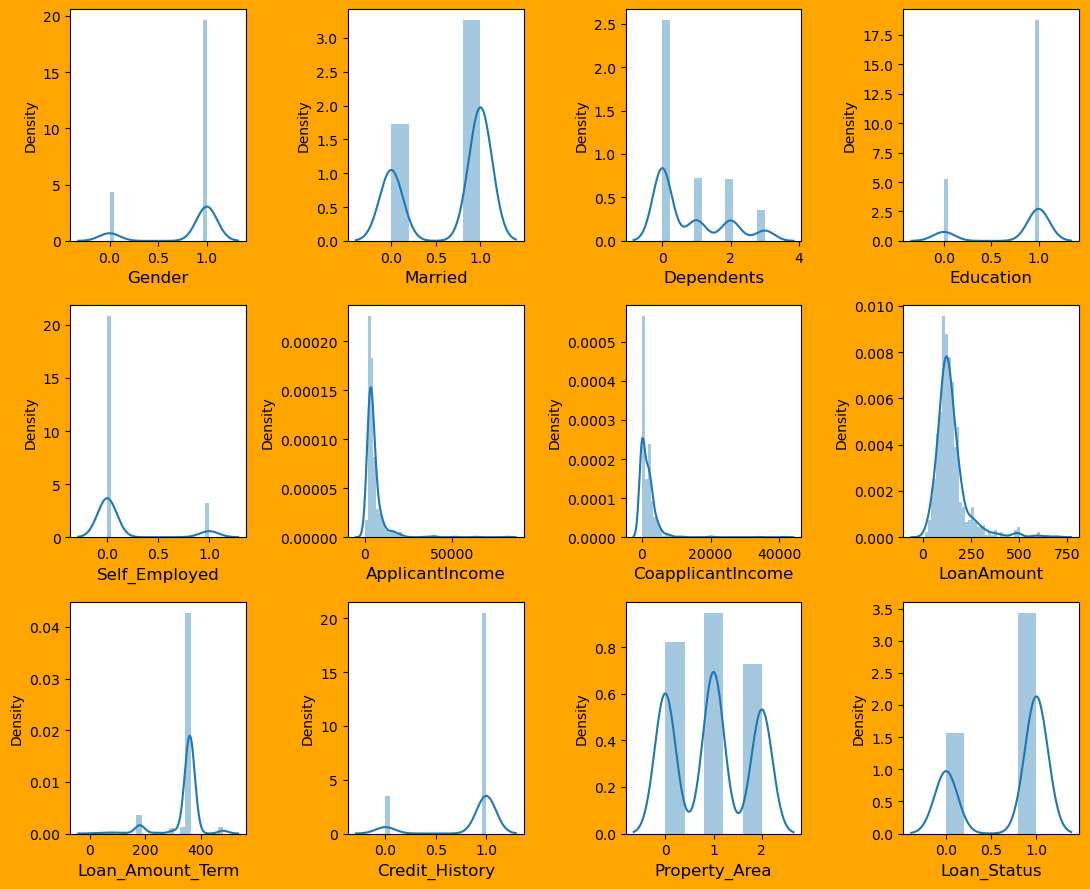

In [21]:
plt.figure(figsize=(11,9),facecolor='orange')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)   ## Plots the graphs 3 rows and 4 columns at specified axis
        sns.distplot(data[column])    ## Plots a distribution plot of the data 
        plt.xlabel(column,fontsize=12)  
    plotnumber +=1     ## Increments or adds the graphs one by one
plt.tight_layout()

In [22]:
df_feature=data.drop('Loan_Status',axis=1)

In [23]:
## Check how many outliers are there in the dataset

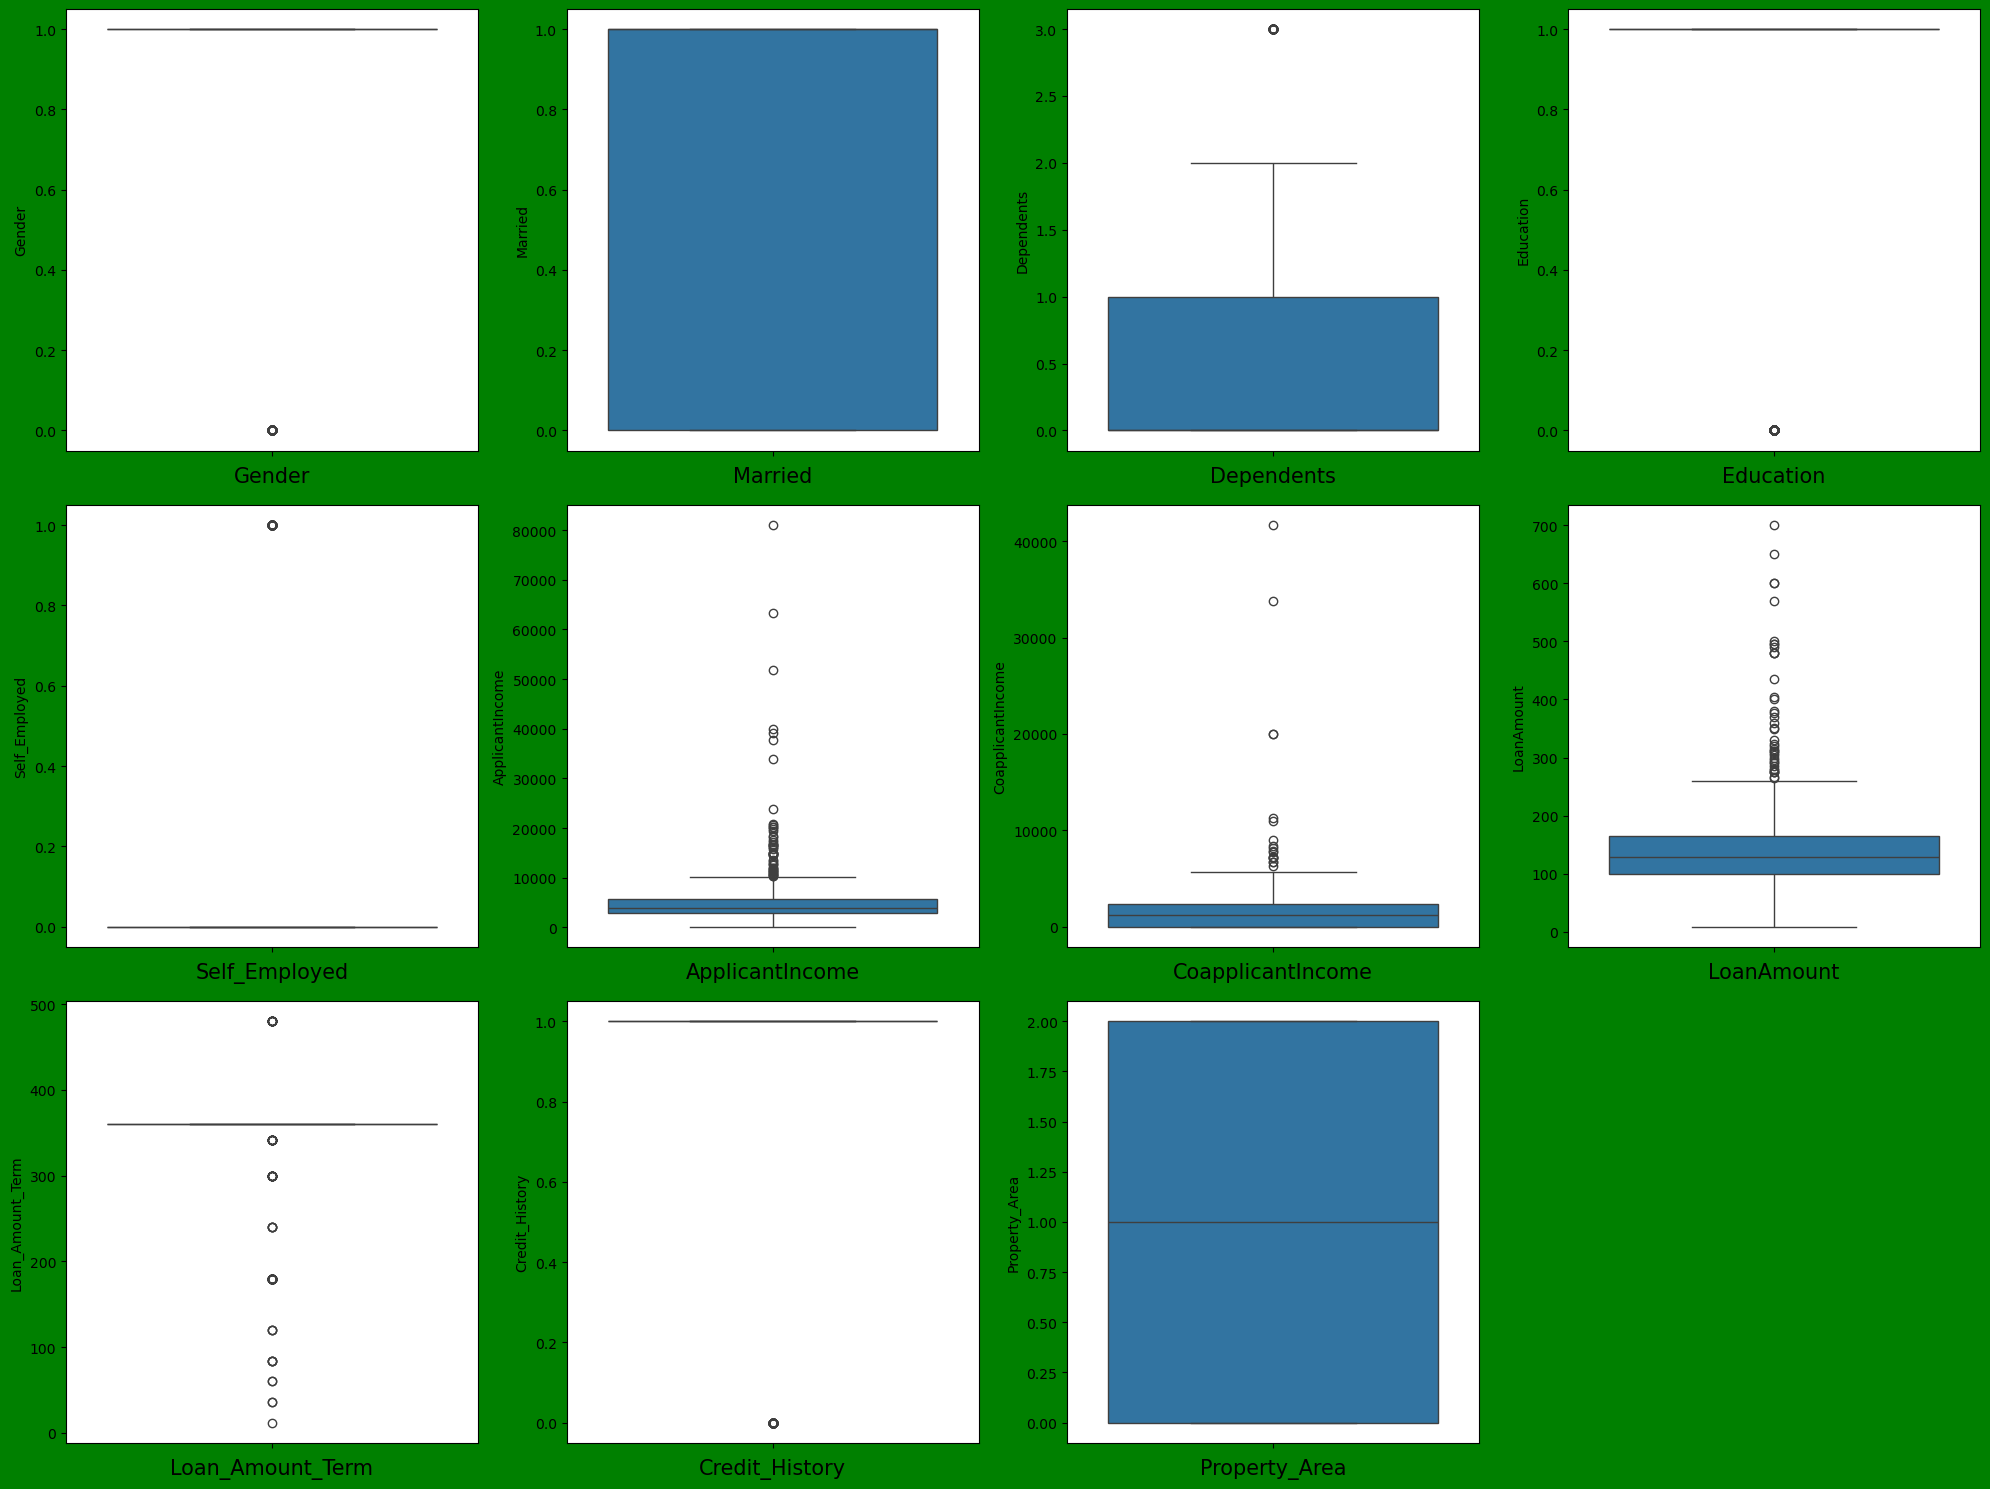

In [24]:
#Visualize the outliers using boxplot
plt.figure(figsize=(20,15),facecolor='green')
plotnumber=1
for column in df_feature:
    if plotnumber <=12:
        plt.subplot(3,4,plotnumber)
        ax=sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.tight_layout()

In [25]:
## As you can see there are Outliers in ApplicatIncome, CoApplicantIncome, LoanAmount and Loan_Amount_Term

In [26]:
data.shape

(614, 12)

In [27]:
#Find the IQR (inter quantile range) to identify

In [28]:
#1st quantile 
q1=data.quantile(0.25)

In [29]:
#3rd quantile
q3=data.quantile(0.75)

In [30]:
#IQR 
IQR =q3  - q1

In [31]:
print(q1)
print(q3)
print(IQR)

Gender                  1.00
Married                 0.00
Dependents              0.00
Education               1.00
Self_Employed           0.00
ApplicantIncome      2877.50
CoapplicantIncome       0.00
LoanAmount            100.25
Loan_Amount_Term      360.00
Credit_History          1.00
Property_Area           0.00
Loan_Status             0.00
Name: 0.25, dtype: float64
Gender                  1.00
Married                 1.00
Dependents              1.00
Education               1.00
Self_Employed           0.00
ApplicantIncome      5795.00
CoapplicantIncome    2297.25
LoanAmount            164.75
Loan_Amount_Term      360.00
Credit_History          1.00
Property_Area           2.00
Loan_Status             1.00
Name: 0.75, dtype: float64
Gender                  0.00
Married                 1.00
Dependents              1.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term  

In [32]:
#Validating one Outlier 
pred_high = (q3.Married + (1.5 * IQR.Married))
pred_high

2.5

In [33]:
#Check the indexes which have higher values
index=np.where(data['Married']>pred_high)
index

(array([], dtype=int64),)

In [34]:
data=data.drop(data.index[index])

In [35]:
data.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,1
610,610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,2,1
611,611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
612,612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [36]:
d_high =(q3.Dependents + (1.5 * IQR.Dependents))
print(d_high)
index=np.where(data['Dependents']>d_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

2.5
(563, 12)


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,608,1,1,0,1,0,3232,1950.0,108.000000,360.0,1.0,2,1
559,609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,1
560,611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
561,612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [37]:
index

(array([  7,  34,  61,  68,  73,  74,  78,  79, 109, 126, 135, 155, 171,
        172, 177, 202, 211, 213, 215, 255, 257, 259, 267, 295, 321, 324,
        338, 340, 343, 352, 359, 376, 390, 391, 409, 442, 461, 466, 472,
        481, 515, 522, 531, 539, 557, 567, 574, 592, 600, 602, 610],
       dtype=int64),)

In [38]:
ai_high =(q3.ApplicantIncome + (1.5 * IQR.ApplicantIncome))
print(ai_high)
index=np.where(data['ApplicantIncome']>ai_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

10171.25
(519, 12)


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,608,1,1,0,1,0,3232,1950.0,108.000000,360.0,1.0,2,1
515,609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,1
516,611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
517,612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [39]:
cai_high =(q3.CoapplicantIncome + (1.5 * IQR.CoapplicantIncome))
print(cai_high)
index=np.where(data['CoapplicantIncome']>cai_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

5743.125
(506, 12)


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,608,1,1,0,1,0,3232,1950.0,108.000000,360.0,1.0,2,1
502,609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,1
503,611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
504,612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [40]:
la_high =(q3.LoanAmount + (1.5 * IQR.LoanAmount))
print(la_high)
index=np.where(data['LoanAmount']>la_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

261.5
(495, 12)


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,608,1,1,0,1,0,3232,1950.0,108.000000,360.0,1.0,2,1
491,609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,1
492,611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
493,612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [41]:
pa_high =(q3.Property_Area + (1.5 * IQR.Property_Area))
print(pa_high)
index=np.where(data['Property_Area']>pa_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

5.0
(495, 12)


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,608,1,1,0,1,0,3232,1950.0,108.000000,360.0,1.0,2,1
491,609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,1
492,611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
493,612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


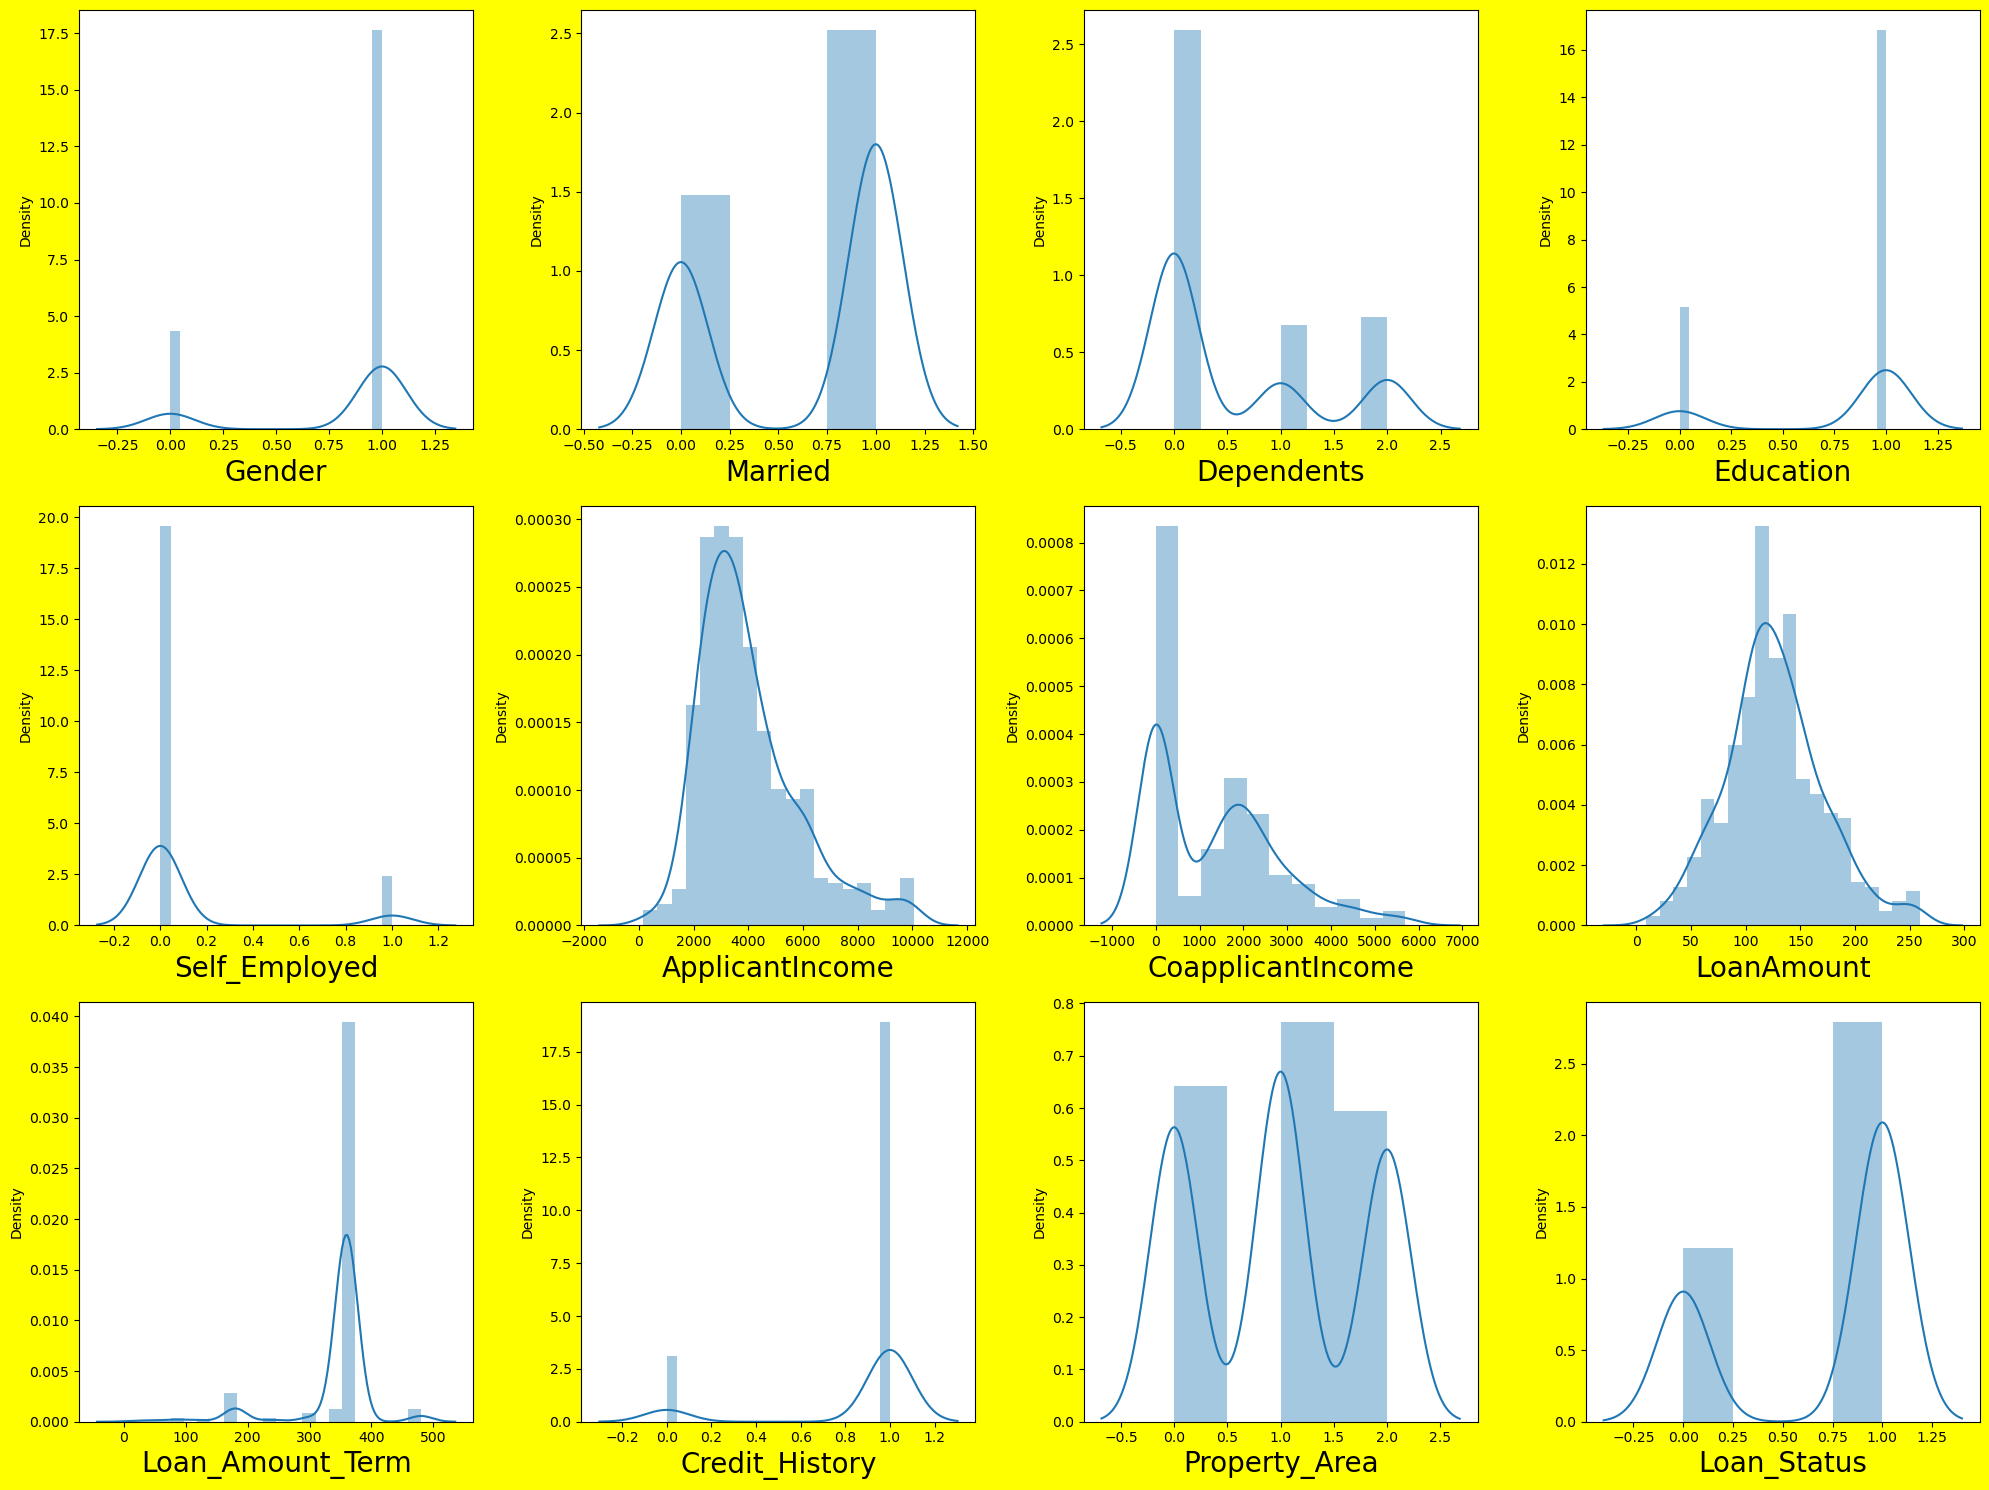

In [42]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber = 1
for column in data :
    if plotnumber <=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

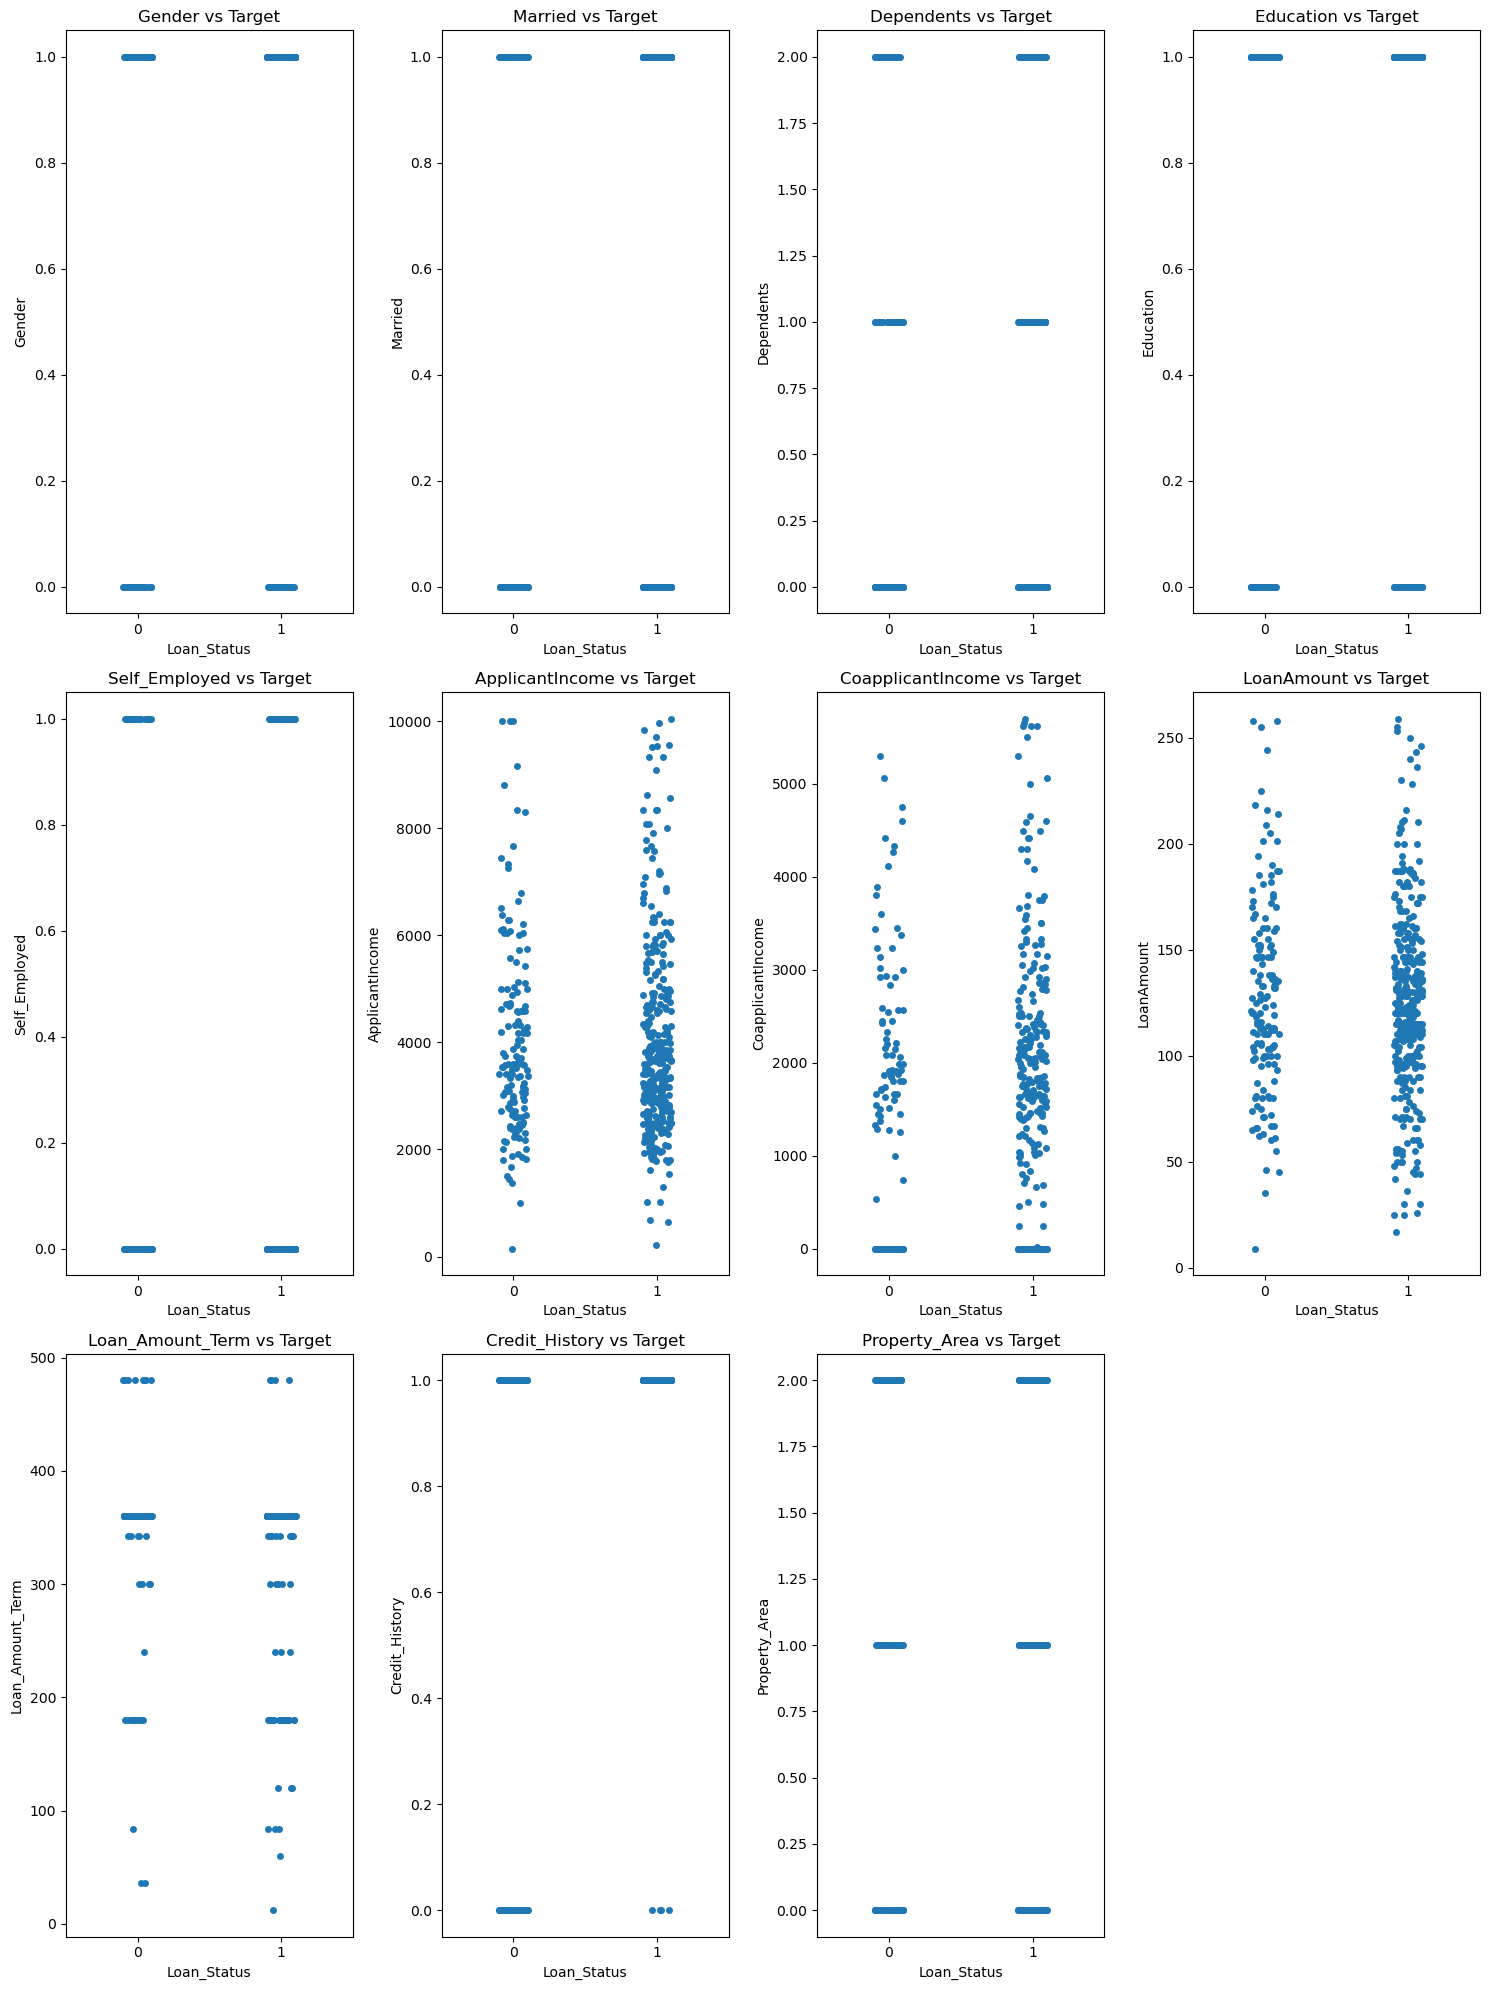

In [43]:
y=data['Loan_Status']             ## Assigning y as labels
x=data.drop(columns=['Loan_Status'])   ## By removing Label assigning remaning columns as features

plt.figure(figsize=(15,20))
plotnumber = 1
for column in x.columns:
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber)
        sns.stripplot(x=y, y=x[column], ax=ax)  # Swap x and y for correct orientation
        ax.set_title(f'{column} vs Target')
    plotnumber += 1
plt.tight_layout()
plt.show()

In [44]:
## Now we have successfully removed the outliers from the dataset from specific columns

In [45]:
## Now we will check for multicollinearity among the dataset

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [48]:
x_scaled.shape

(495, 11)

In [49]:
#Finding Variance inflation factor is each scaled column i.e x_scaled.shape[1] (1/(1=R2))

In [50]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

vif['Features']=x.columns

In [51]:
vif

,vif,Features
0,1.189855,Gender
1,1.361510,Married
2,1.163724,Dependents
3,1.056020,Education
4,1.037287,Self_Employed
5,1.874877,ApplicantIncome
6,1.621426,CoapplicantIncome
7,1.899343,LoanAmount
8,1.062111,Loan_Amount_Term
9,1.011771,Credit_History


In [52]:
## As you can see that all the values are <5 and is very low

In [53]:
## Hence there is no multicollinearity

In [54]:
## Now we are Ready to build our first model
## Logistic Regression

## Logistic Regression

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [56]:
log_reg=LogisticRegression()

In [57]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [58]:
## Lets see how are model performs on the test data

In [59]:
y_pred=log_reg.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [60]:
## Training Score
log_reg.score(x_train,y_train)

0.8194070080862533

In [61]:
#Model Accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8467741935483871

In [62]:
confusion_matrix(y_test,y_pred)

array([[15, 19],
       [ 0, 90]], dtype=int64)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61        34
           1       0.83      1.00      0.90        90

    accuracy                           0.85       124
   macro avg       0.91      0.72      0.76       124
weighted avg       0.87      0.85      0.82       124



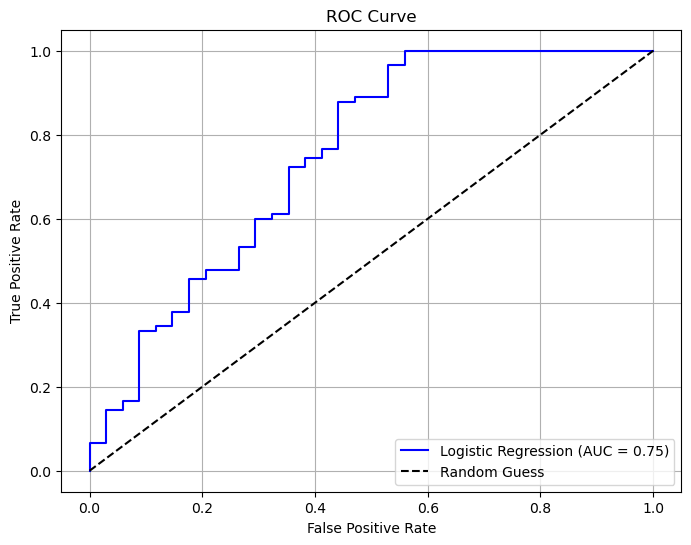

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = log_reg.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## K-Fold Cross Validation

In [65]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the loan prediction dataset
# Replace 'loan_data.csv' with the actual path to your dataset

# Step 1: Preprocessing
# Separate features and target
x = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
x = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

# Encode categorical variables
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Encode target (Loan_Status)
x = pd.get_dummies(x)  # One-hot encoding for categorical features

# Step 2: Logistic Regression Model
model = LogisticRegression(max_iter=1000)

# Step 3: K-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy for each fold
cv_results = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

# Print the results
print(f"Cross-Validation Accuracy for each fold: {cv_results}")
print(f"Mean Accuracy: {cv_results.mean():.2f}")
print(f"Standard Deviation of Accuracy: {cv_results.std():.2f}")


Cross-Validation Accuracy for each fold: [0.7804878  0.80487805 0.83739837 0.7804878  0.81967213]
Mean Accuracy: 0.80
Standard Deviation of Accuracy: 0.02


## Hyperparameter Tuning

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the loan prediction dataset
# Replace 'loan_data.csv' with the actual path to your dataset

# Step 1: Preprocessing
# Separate features and target
x = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
x = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

# Encode categorical variables
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Encode target (Loan_Status)
x = pd.get_dummies(x)  # One-hot encoding for categorical features

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Logistic Regression Model
model = LogisticRegression(max_iter=1000)

# Step 3: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the GridSearchCV
grid_search.fit(x_train, y_train)

# Best hyperparameters and their performance
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 4: Evaluate on Test Data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8145949288806431
Test Accuracy: 0.79


## Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model = DecisionTreeClassifier()

In [69]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
## Training Score
model.score(x_train,y_train)

1.0

In [71]:
## Testing Score
model.score(x_test,y_test)

0.7235772357723578

In [72]:
confusion_matrix(y_test,y_pred)

array([[18, 25],
       [ 1, 79]], dtype=int64)

In [73]:
## As you can see our decision model is overfitting

In [74]:
##Print Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



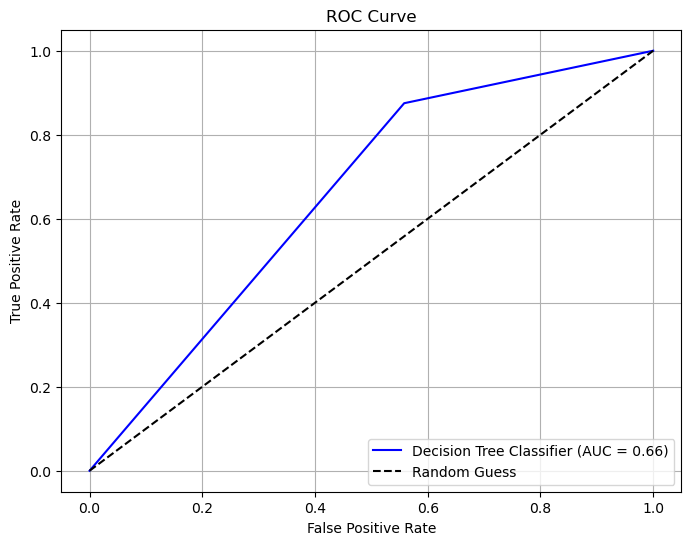

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree Classifier (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## K-Fold Cross Validation

In [76]:
# Import necessary libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# Replace 'loan_prediction.csv' with the path to your dataset

# Preprocessing
# Assuming the dataset has a target column named 'Loan_Status'
# and other categorical features need encoding.
label_encoder = LabelEncoder()

# Encode target variable
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])

# Encode categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Separate features and target
x = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Initialize the model
clf = DecisionTreeClassifier(random_state=42)

# Initialize KFold Cross Validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(clf, x, y, cv=kf, scoring='accuracy')

# Print results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

Cross-Validation Scores: [0.65853659 0.7398374  0.68292683 0.67479675 0.74590164]
Mean Accuracy: 0.7003998400639745
Standard Deviation of Accuracy: 0.0356064355651793


## Hyperparameter Tuning

In [77]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# Replace 'loan_prediction.csv' with the path to your dataset

# Preprocessing
label_encoder = LabelEncoder()

# Encode target variable
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])

# Encode categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Separate features and target
x = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Initialize the base model
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Splitting criteria
    'max_depth': [3, 5, 10, None],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5, 10],           # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2'],      # Number of features to consider for best split
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the metric
    cv=5,                # 5-fold cross-validation
    verbose=1,           # Show progress
    n_jobs=-1            # Use all processors
)

# Perform the grid search
grid_search.fit(x, y)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy: 0.8078501932560309


## Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
model2 = RandomForestClassifier()

In [90]:
x_train

,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,Loan_ID_LP001014,Loan_ID_LP001018,Loan_ID_LP001020,...,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
83,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
90,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
227,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
482,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
464,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
106,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
270,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
435,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False


In [80]:
model2.fit(x_train,y_train)

RandomForestClassifier()

In [81]:
model2.score(x_train,y_train)

1.0

In [82]:
model2.score(x_test,y_test)

0.7886178861788617

In [83]:
confusion_matrix(y_test,y_pred)

array([[18, 25],
       [ 1, 79]], dtype=int64)

In [84]:
##Print Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



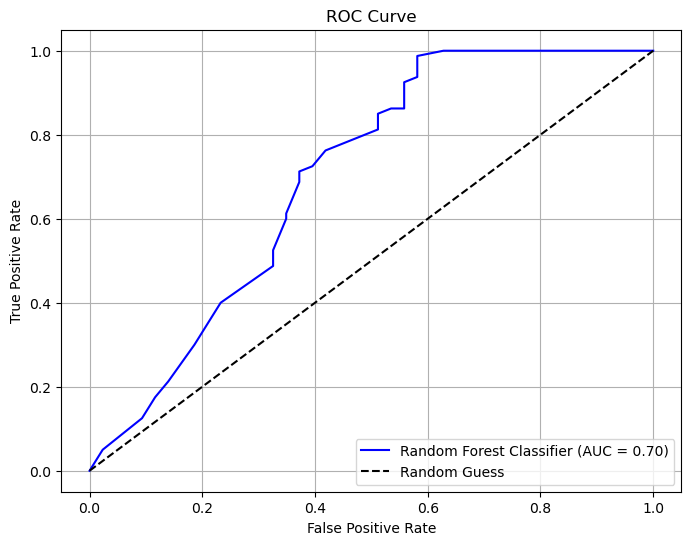

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = model2.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest Classifier (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## K-Fold Cross Validation

In [86]:
# Import necessary libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# Replace 'loan_prediction.csv' with the path to your dataset

# Preprocessing
label_encoder = LabelEncoder()

# Encode target variable
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])

# Encode categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Separate features and target
x = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Initialize the model
rf_clf = RandomForestClassifier(random_state=42)

# Initialize KFold Cross Validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(rf_clf, x, y, cv=kf, scoring='accuracy')

# Print results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

Cross-Validation Scores: [0.77235772 0.78861789 0.79674797 0.7804878  0.80327869]
Mean Accuracy: 0.7882980141276823
Standard Deviation of Accuracy: 0.011054563460597274


## Hyperparameter Tuning

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('loan_prediction.csv')

# Preprocessing
label_encoder = LabelEncoder()
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Separate features and targetlikho tum
x = data.drop(['Loan_Status','Loan_ID'], axis=1)
y = data['Loan_Status']

# Initialize the model
rf_clf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],             # Number of trees
    'max_depth': [None, 10, 20],            # Tree depth
    'min_samples_split': [2, 5],            # Minimum samples to split
    'min_samples_leaf': [1, 2],              # Minimum samples at leaf
    'max_features': ['sqrt', 'log2', None],     # Features to consider for split
    'bootstrap': [True],                 # Use bootstrapping
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the metric
    cv=5,                # 5-fold cross-validation
    verbose=2,           # Show progress
    n_jobs=-1            # Use all processors
)

# Perform the grid search
grid_search.fit(x, y)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.8045981607357058


### Hence Random Forest Classifier model is the best fit for this prediction as compared to the best Accuracy score

In [97]:
import pickle

# Save the trained GridSearchCV model
with open('grid_search_modela.pkl', 'wb') as file:
    pickle.dump(grid_search, file)
